In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r"C:\Users\VAIBHAV\Downloads\Students_Performance.xlsx")

df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             200 non-null    object 
 1   Gender                 200 non-null    object 
 2   Age                    200 non-null    int64  
 3   Study_Hours_per_Week   106 non-null    float64
 4   Attendance_Percentage  103 non-null    float64
 5   Math_Score             123 non-null    float64
 6   Science_Score          105 non-null    float64
 7   English_Score          100 non-null    float64
 8   Final_Result           200 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 14.2+ KB


,Student_ID,Gender,Age,Study_Hours_per_Week,Attendance_Percentage,Math_Score,Science_Score,English_Score,Final_Result
0,S001,Female,19,NaN,NaN,NaN,NaN,NaN,Fail
1,S002,Female,18,20.0,50.0,49.0,NaN,NaN,Pass
2,S003,Female,22,4.0,NaN,NaN,53.0,34.0,Pass
3,S004,Female,22,NaN,NaN,69.0,NaN,NaN,Pass
4,S005,Male,22,29.0,96.0,NaN,46.0,63.0,Pass


In [2]:
df.describe()


,Age,Study_Hours_per_Week,Attendance_Percentage,Math_Score,Science_Score,English_Score
count,200.000000,106.000000,103.000000,123.000000,105.000000,100.000000
mean,19.050000,21.169811,74.485437,105.902439,65.057143,61.940000
std,2.061248,12.043154,14.495343,45.178955,19.955638,21.231204
min,16.000000,1.000000,50.000000,31.000000,30.000000,30.000000
25%,17.000000,11.000000,63.500000,66.000000,48.000000,44.000000
50%,19.000000,21.000000,74.000000,97.000000,69.000000,60.000000
75%,21.000000,31.750000,86.500000,150.000000,81.000000,79.250000
max,22.000000,40.000000,100.000000,150.000000,99.000000,100.000000


In [3]:
missing_percent = df.isna().mean() * 100
missing_percent.sort_values(ascending=False)

English_Score            50.0
Attendance_Percentage    48.5
Science_Score            47.5
Study_Hours_per_Week     47.0
Math_Score               38.5
Student_ID                0.0
Gender                    0.0
Age                       0.0
Final_Result              0.0
dtype: float64

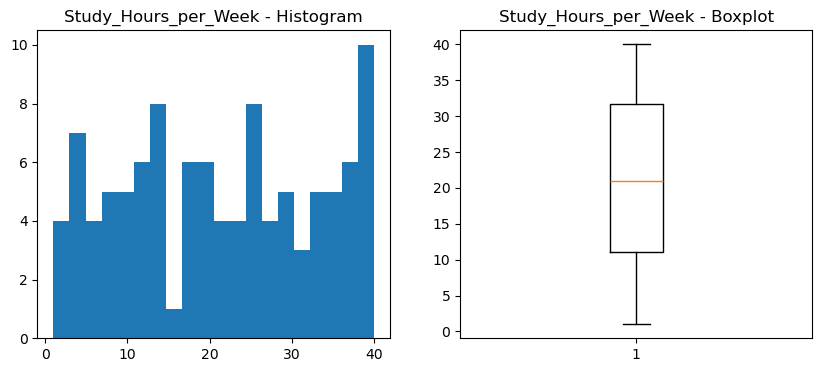

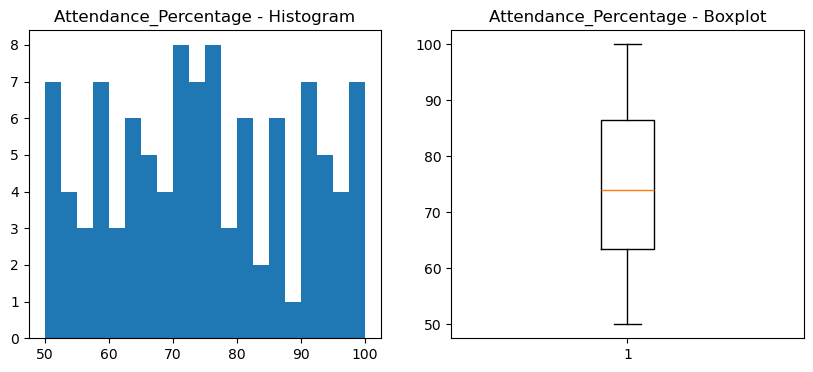

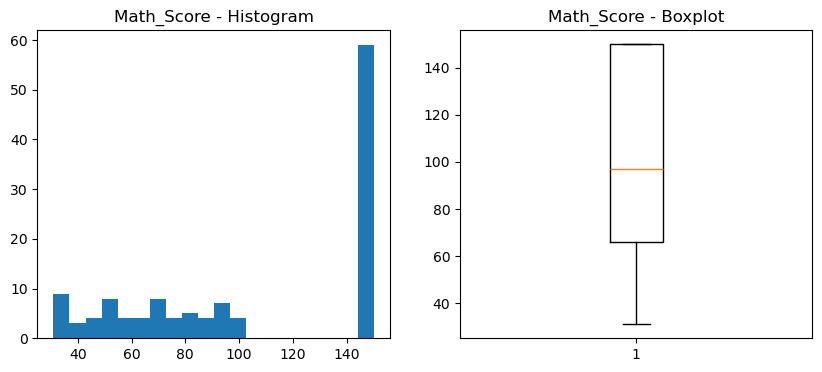

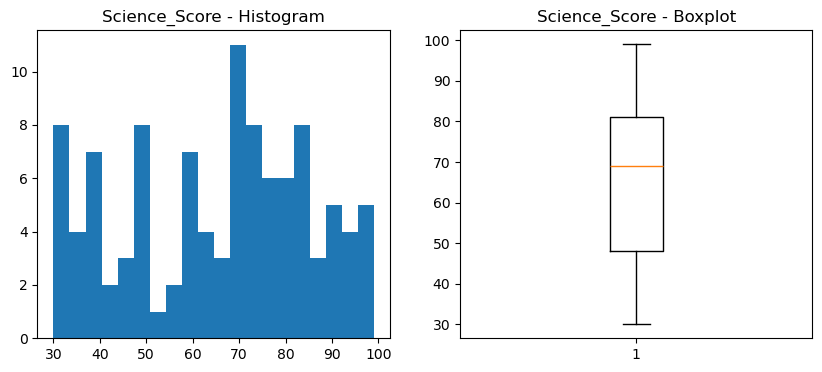

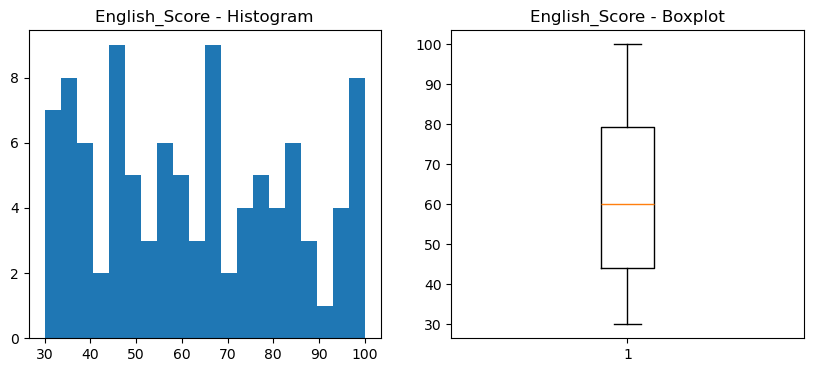

In [4]:
numeric_cols = [
    "Study_Hours_per_Week",
    "Attendance_Percentage",
    "Math_Score",
    "Science_Score",
    "English_Score"
]

for col in numeric_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.hist(df[col].dropna(), bins=20)
    plt.title(f"{col} - Histogram")

    plt.subplot(1,2,2)
    plt.boxplot(df[col].dropna())
    plt.title(f"{col} - Boxplot")

    plt.show()


In [5]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)


In [6]:
df["Math_Outlier"] = detect_outliers_iqr(df["Math_Score"])
df["Science_Outlier"] = detect_outliers_iqr(df["Science_Score"])
df["English_Outlier"] = detect_outliers_iqr(df["English_Score"])


In [7]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.clip(series, lower, upper)

for col in ["Math_Score", "Science_Score", "English_Score"]:
    df[col] = cap_outliers(df[col])


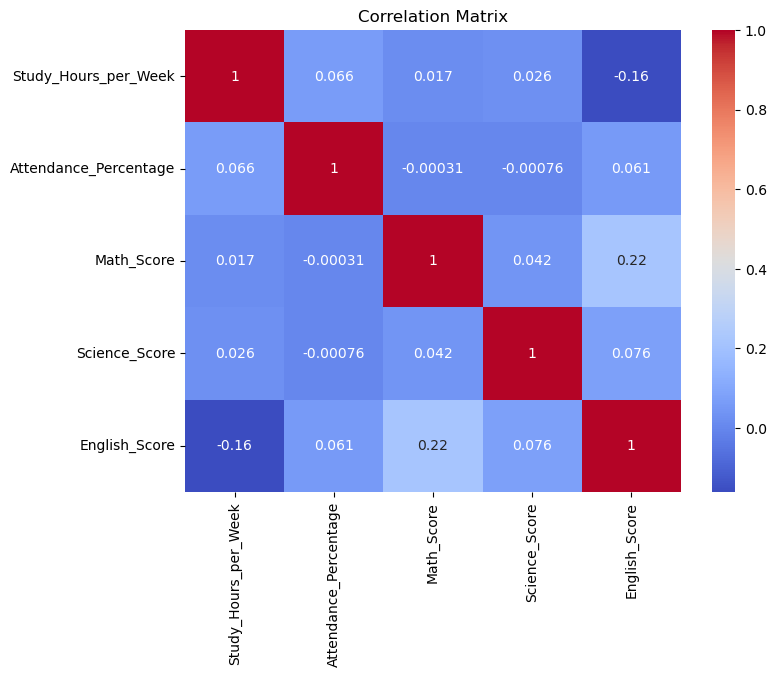

In [8]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [9]:
df.to_excel("Students_Performance_Cleaned.xlsx", index=False)

Project-Ready Summary (Use in Resume)

Performed exploratory data analysis on student performance data using Python. Handled missing values, visualized distributions, detected and treated outliers using the IQR method, analyzed correlations, and exported a cleaned dataset for further analytics.